<a href="https://colab.research.google.com/github/sur-sakthy/computer-vision/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #1
The provided data has a train/validation split of 1000/500 (approx.) images. In this task you are to select any 4 classes from the original ImageNette data as your working dataset (i.e. classification whereby you are predicting one of four possible classes).

Additionally, you need to reorganise the data into appropriate train/validation/test split before you train your network models. The details of the splitting is left to you, but you must fully justify any final split used in your evaluation.

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
!cp '/content/drive/MyDrive/EE544 Computer Vision/imagenette2-160.tgz' ./

In [3]:
# remove %%capture command to show output from unzipping
%%capture 
!tar zxvf /content/imagenette2-160.tgz

## Imports

In [4]:
import os
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, AUC, Recall
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

## Constants

In [5]:
PATH_TO_TRAIN_DATA = '/content/imagenette2-160/train'
PATH_TO_VAL_DATA = '/content/imagenette2-160/val'
IMG_WIDTH=64
IMG_HEIGHT=64
NUM_CLASSES=4

In [6]:
all_classes = os.listdir(PATH_TO_TRAIN_DATA)
all_classes

['n03888257',
 'n02102040',
 'n02979186',
 'n03425413',
 'n03445777',
 'n03000684',
 'n03028079',
 'n03394916',
 'n03417042',
 'n01440764',
 '.DS_Store']

In [7]:
all_classes = os.listdir(PATH_TO_VAL_DATA)
all_classes

['n03888257',
 'n02102040',
 'n02979186',
 'n03425413',
 'n03445777',
 'n03000684',
 'n03028079',
 'n03394916',
 'n03417042',
 'n01440764']

## Load dataset

In [8]:
data = []
labels = []

In [9]:
def load_dataset(img_folder): 
    for dir in os.listdir(img_folder):
      if dir == 'n03445777' or dir == 'n03417042' or dir == 'n02979186' or dir == 'n03028079' :
        for file in os.listdir(os.path.join(img_folder, dir)):
       
            image_path = os.path.join(img_folder, dir, file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
            image = np.array(image)
            image = image.astype('float32')
            image /= 255
            data.append(image)
            labels.append(dir)

In [10]:
load_dataset(PATH_TO_TRAIN_DATA)
load_dataset(PATH_TO_VAL_DATA)

In [11]:
np.unique(labels)

array(['n02979186', 'n03028079', 'n03417042', 'n03445777'], dtype='<U9')

In [12]:
data[0]

array([[[0.1254902 , 0.13333334, 0.10980392],
        [0.1254902 , 0.13333334, 0.10980392],
        [0.12941177, 0.13333334, 0.11372549],
        ...,
        [0.3372549 , 0.28627452, 0.11764706],
        [0.34509805, 0.29411766, 0.12156863],
        [0.34901962, 0.29803923, 0.1254902 ]],

       [[0.12941177, 0.13333334, 0.11764706],
        [0.12941177, 0.13333334, 0.11764706],
        [0.12941177, 0.13333334, 0.11764706],
        ...,
        [0.34509805, 0.29803923, 0.1254902 ],
        [0.35686275, 0.30588236, 0.12941177],
        [0.3647059 , 0.30980393, 0.13333334]],

       [[0.12941177, 0.13725491, 0.1254902 ],
        [0.12941177, 0.13725491, 0.1254902 ],
        [0.12941177, 0.14117648, 0.12941177],
        ...,
        [0.35686275, 0.30980393, 0.13333334],
        [0.3647059 , 0.3137255 , 0.12941177],
        [0.37254903, 0.31764707, 0.12941177]],

       ...,

       [[0.05098039, 0.05882353, 0.05882353],
        [0.05098039, 0.05882353, 0.05882353],
        [0.05490196, 0

In [13]:
np.min(data), np.max(data)

(0.0, 1.0)

## Shuffle and split

In [14]:
data, labels = shuffle(data, labels, random_state=0)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.30, random_state=42)

## Class distribution

In [16]:
df_train = pd.DataFrame(y_train, columns=['label'])
df_train.head()

,label
0,n03028079
1,n02979186
2,n03417042
3,n03445777
4,n03028079


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


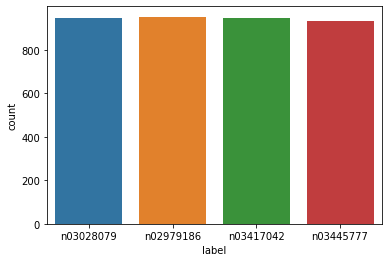

In [17]:
sns.countplot(df_train['label'])
plt.show()

In [18]:
df_test = pd.DataFrame(y_test, columns=['label'])
df_test.head()

,label
0,n03028079
1,n03028079
2,n03028079
3,n03417042
4,n03417042


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


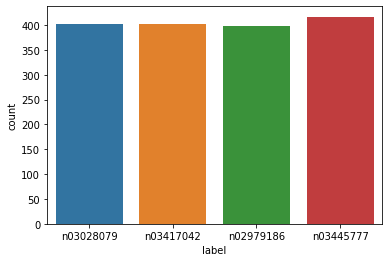

In [19]:
sns.countplot(df_test['label'])
plt.show()

## Encoding

In [20]:
def one_hot_encode(y, num_classes):
  le = LabelEncoder()
  return to_categorical(le.fit_transform(y), num_classes)

In [21]:
y_train[0]

'n03028079'

In [22]:
y_train = one_hot_encode(y_train, NUM_CLASSES)

In [23]:
y_train[0]

array([0., 1., 0., 0.], dtype=float32)

In [24]:
y_test[0]

'n03028079'

In [25]:
y_test = one_hot_encode(y_test, NUM_CLASSES)

In [26]:
y_test[0]

array([0., 1., 0., 0.], dtype=float32)

## Create train, validation and test sets

In [27]:
train_datagen = ImageDataGenerator(        
        fill_mode="nearest",
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.1
)

test_datagen = ImageDataGenerator()

In [28]:
train_ds = train_datagen.flow(
  np.array(X_train), y_train,
  subset="training",
  shuffle=True,
  batch_size=20
)

val_ds = train_datagen.flow(
  np.array(X_train), y_train,
  subset="validation",
  shuffle=True,
  batch_size=20
)

test_ds = test_datagen.flow(
  np.array(X_test), y_test,
  shuffle=False,
  batch_size=20
)

## Build model

In [29]:
def build_model(batchNorm=False, dropOut=False):
  model = Sequential()

  model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(64,64,3)))

  if batchNorm:
    model.add(BatchNormalization())
  
  model.add(Conv2D(32, kernel_size=3, activation='relu'))
  
  if batchNorm:
    model.add(BatchNormalization())
  
  model.add(MaxPooling2D(pool_size=(2,2)))

  if dropOut:
    model.add(Dropout(0.5))

  model.add(Conv2D(64, kernel_size=3, activation='relu'))
  model.add(Conv2D(64, kernel_size=3, activation='relu'))
  
  if batchNorm:
    model.add(BatchNormalization())
  
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dense(512))

  if batchNorm:
    model.add(BatchNormalization())

  if dropOut:
    model.add(Dropout(0.5))

  model.add(Dense(NUM_CLASSES, activation='softmax'))

  model.compile(
      optimizer=Adam(),
      loss='categorical_crossentropy',
      metrics=[
          CategoricalAccuracy(),
          Precision(), 
          Recall(),
          AUC()
        ]
  )

  return model

In [30]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                    

## Train model

### Initialise callbacks

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, patience=5)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/EE544 Computer Vision/task-1-best-weights.hdf5', verbose=1, save_best_only=True, monitor='val_categorical_accuracy')

### Fit the model

In [32]:
history = model.fit(
    train_ds,
    epochs=150,
    verbose=1,
    validation_data=val_ds,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/150
171/171 [==============================] - ETA: 0s - loss: 1.0047 - categorical_accuracy: 0.5814 - precision: 0.7142 - recall: 0.4077 - auc: 0.8251
Epoch 1: val_categorical_accuracy improved from -inf to 0.65608, saving model to /content/drive/MyDrive/EE544 Computer Vision/task-1-best-weights.hdf5
171/171 [==============================] - 89s 501ms/step - loss: 1.0047 - categorical_accuracy: 0.5814 - precision: 0.7142 - recall: 0.4077 - auc: 0.8251 - val_loss: 0.8502 - val_categorical_accuracy: 0.6561 - val_precision: 0.7509 - val_recall: 0.5265 - val_auc: 0.8775
Epoch 2/150
171/171 [==============================] - ETA: 0s - loss: 0.8216 - categorical_accuracy: 0.6793 - precision: 0.7606 - recall: 0.5735 - auc: 0.8864
Epoch 2: val_categorical_accuracy improved from 0.65608 to 0.70106, saving model to /content/drive/MyDrive/EE544 Computer Vision/task-1-best-weights.hdf5
171/171 [==============================] - 89s 521ms/step - loss: 0.8216 - categorical_accuracy: 0.6793

## Plot results

In [33]:
def plot(train, validation, ylabel, title):
  plt.plot(train, color='red', label='train') 
  plt.plot(validation, color='blue', label='validation') 
  plt.title(title) 
  plt.ylabel(ylabel)
  plt.xlabel('Epoch')
  plt.legend() 
  plt.grid(linestyle='-', linewidth=0.5)

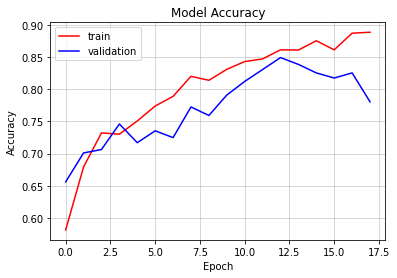

In [34]:
plot(history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 'Accuracy', 'Model Accuracy')

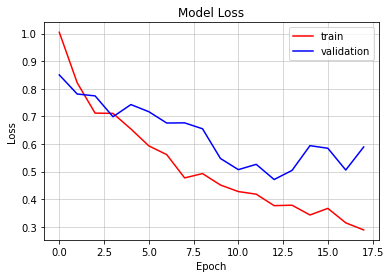

In [35]:
plot(history.history['loss'], history.history['val_loss'], 'Loss', 'Model Loss')

## Evaluate model

In [36]:
eval_results = model.evaluate(test_ds, batch_size=30)

81/81 [==============================] - 8s 95ms/step - loss: 0.5214 - categorical_accuracy: 0.8401 - precision: 0.8552 - recall: 0.8241 - auc: 0.9593


In [37]:
print('Test loss:', eval_results[0])
print('Test categorical_accuracy:', eval_results[1])
print('Test precision:', eval_results[2])
print('Test recall:', eval_results[3])
print('Test auc:', eval_results[4])

Test loss: 0.5214337110519409
Test categorical_accuracy: 0.8401234745979309
Test precision: 0.8552210330963135
Test recall: 0.8240740895271301
Test auc: 0.9593361616134644


In [38]:
pred = model.predict(test_ds)

81/81 [==============================] - 7s 81ms/step


In [39]:
pred

array([[5.45629846e-05, 9.79866982e-01, 1.95628125e-02, 5.15651831e-04],
       [2.21536588e-03, 8.83757174e-01, 1.12571634e-01, 1.45590305e-03],
       [8.77555576e-04, 8.99473429e-01, 9.91699770e-02, 4.79061011e-04],
       ...,
       [1.60287499e-01, 7.34492019e-02, 3.20429534e-01, 4.45833683e-01],
       [5.03198802e-02, 7.68025501e-08, 9.49648082e-01, 3.19269311e-05],
       [2.47445314e-06, 2.31748648e-13, 1.47965722e-12, 9.99997497e-01]],
      dtype=float32)

In [40]:
def draw_confusion_matrix(true, pred):
  cm = confusion_matrix(true.argmax(axis=1), pred.argmax(axis=1))
  sns.heatmap(cm, annot=True, annot_kws={"size": 12}, fmt='g', cbar=False, cmap="viridis")
  plt.show()

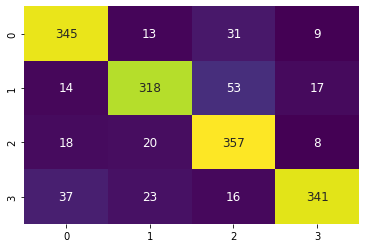

In [41]:
draw_confusion_matrix(y_test, pred)

In [42]:
print(classification_report(y_test.argmax(axis=1), pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       398
           1       0.85      0.79      0.82       402
           2       0.78      0.89      0.83       403
           3       0.91      0.82      0.86       417

    accuracy                           0.84      1620
   macro avg       0.84      0.84      0.84      1620
weighted avg       0.84      0.84      0.84      1620



## Improve the baseline networks performance
1. Batch Normalisation 
2. Dropout 
3. Kernel Initialisation
4. Regularisation

In [43]:
improved_model = build_model(batchNorm=True)
improved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 60, 60, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                      

In [ ]:
improved_history = improved_model.fit(
    train_ds,
    epochs=5,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/5
171/171 [==============================] - 101s 567ms/step - loss: 1.4668 - categorical_accuracy: 0.6343 - precision_1: 0.6614 - recall_1: 0.5897 - auc_1: 0.8321 - val_loss: 2.5495 - val_categorical_accuracy: 0.2434 - val_precision_1: 0.2434 - val_recall_1: 0.2434 - val_auc_1: 0.5712
Epoch 2/5
171/171 [==============================] - 99s 579ms/step - loss: 0.7295 - categorical_accuracy: 0.7372 - precision_1: 0.7740 - recall_1: 0.6925 - auc_1: 0.9140 - val_loss: 2.5240 - val_categorical_accuracy: 0.2487 - val_precision_1: 0.2487 - val_recall_1: 0.2487 - val_auc_1: 0.6450
Epoch 3/5
171/171 [==============================] - 100s 584ms/step - loss: 0.6747 - categorical_accuracy: 0.7449 - precision_1: 0.7891 - recall_1: 0.6949 - auc_1: 0.9243 - val_loss: 1.0547 - val_categorical_accuracy: 0.5741 - val_precision_1: 0.6194 - val_recall_1: 0.5079 - val_auc_1: 0.8354
Epoch 4/5
  8/171 [>.............................] - ETA: 1:36 - loss: 0.6290 - categorical_accuracy: 0.7625 - preci